<a href="https://colab.research.google.com/github/gerhardteduardo/physics-computational/blob/main/P1_Fiscomp3_Eduardo_Gerhardt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eduardo Gerhardt

---



In [42]:
import numpy as np
import matplotlib.pyplot as plt

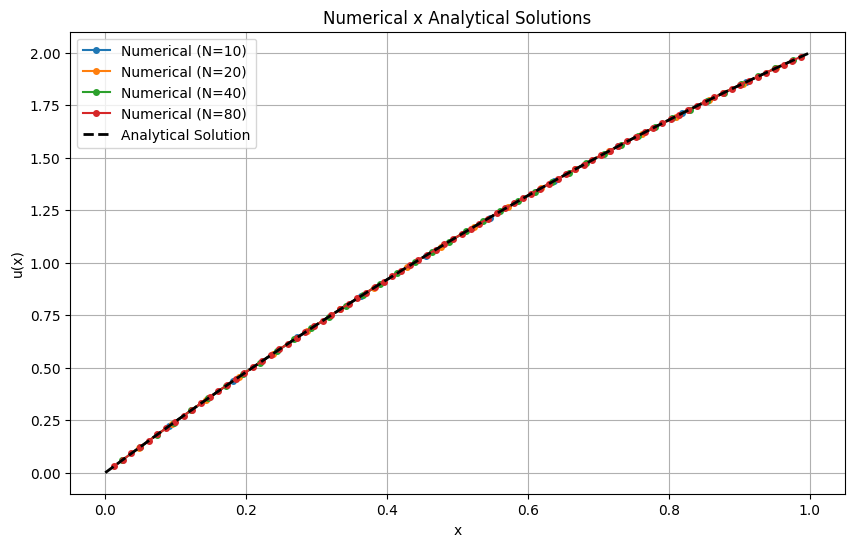

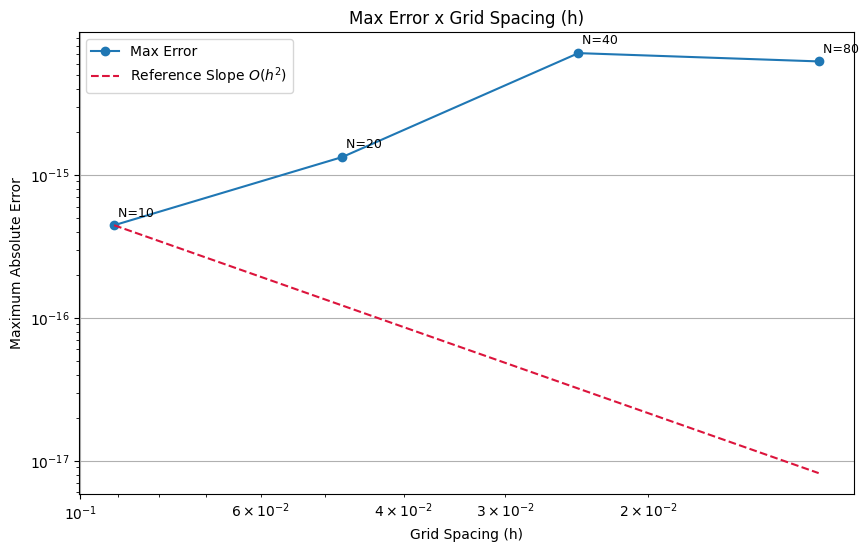

In [43]:
## DEFINES ##
DOMAIN_START = 0.0
DOMAIN_END = 1.0
BOUNDARY_U0 = 0.0  # u(0) = 0
BOUNDARY_U1 = 2.0  # u(1) = 2

## MATH FUNCTIONS ##

def assemble_laplacian_matrix(N):
    """Assembles the 1D Laplacian matrix 'A' using a central difference scheme."""
    main_diag = 2 * np.ones(N)
    off_diag = -1 * np.ones(N - 1)
    A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
    return A

def assemble_rhs_vector(N, h, bc_start, bc_end):
    """Assembles the right-hand-side vector 'b', including source and BCs."""
    b = h**2 * np.ones(N)  # Source term contribution
    b[0] += bc_start      # Boundary condition at start
    b[-1] += bc_end       # Boundary condition at end
    return b

def get_analytical_solution(x):
    return -0.5 * x**2 + 2.5 * x

## PLOT FUNCTIONS ##

def plot_solutions(simulation_results):
    """
    Plots numerical solutions and the exact solution.
    """
    plt.figure(figsize=(10, 6))
    plt.title("Numerical x Analytical Solutions")
    plt.xlabel("x")
    plt.ylabel("u(x)")

    for result in simulation_results:
        label = f"Numerical (N={result['N']})"
        plt.plot(result['x'], result['u'], 'o-', markersize=4, label=label)
    x_fine = np.linspace(DOMAIN_START, DOMAIN_END, 200)
    u_analytical_fine = get_analytical_solution(x_fine)
    plt.plot(x_fine, u_analytical_fine, '--', color='black', linewidth=2, label='Analytical Solution')
    plot_finalization()

def plot_convergence(h_values, max_errors, N_values):
    """
    log-log plot to see the convergence of the maximum error.
    """
    plt.figure(figsize=(10, 6))
    plt.title("Max Error x Grid Spacing (h)")
    plt.xlabel("Grid Spacing (h)")
    plt.ylabel("Maximum Absolute Error")

    plt.loglog(h_values, max_errors, 'o-', label='Max Error')
    for N, h, err in zip(N_values, h_values, max_errors):
        plt.text(h, err * 1.1, f' N={N}', verticalalignment='bottom', fontsize=9)
    C = max_errors[0] / (h_values[0]**2)
    h_ref = np.array(h_values)
    error_ref = C * h_ref**2
    plt.loglog(h_ref, error_ref, '--', color='crimson', label='Reference Slope $O(h^2)$')
    plt.gca().invert_xaxis()
    plot_finalization()

def plot_finalization():
    plt.grid()
    plt.legend()
    plt.show()

## MAIN CODE ##

N_grid_sizes = [10, 20, 40, 80]

all_results = []
h_values = []
max_errors = []

for N in N_grid_sizes:
    # 1. Setup grid
    h = (DOMAIN_END - DOMAIN_START) / (N + 1)
    x_grid = np.linspace(DOMAIN_START + h, DOMAIN_END - h, N)

    # 2. Assemble and solve the linear system
    A = assemble_laplacian_matrix(N)
    b = assemble_rhs_vector(N, h, BOUNDARY_U0, BOUNDARY_U1)
    u_numerical = np.linalg.solve(A, b)

    # 3. Calculate error against the analytical solution
    u_analytical = get_analytical_solution(x_grid)
    error = np.max(np.abs(u_numerical - u_analytical))

    # 4. Store all computed data
    all_results.append({'N': N, 'x': x_grid, 'u': u_numerical})
    h_values.append(h)
    max_errors.append(error)

plot_solutions(all_results)
plot_convergence(h_values, max_errors, N_grid_sizes)